#**UNIVPM - Stefano Perniola**

Modelli per la fall detection sul dataset (Home, Coffee room, Office, Lecture room)

Cartelle totali del Dataset:
- Home_01
- Home_02
- Coffe_room_01
- Coffe_room_02
- Lecture room
- Office

Cartelle senza annotazioni (da usare magari come validation set)
- Lecture_room
- Office

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Unzip Dataset (da eseguire una volta)

Estrae i file .zip dal Drive

In [5]:
import os
import zipfile

path = "drive/MyDrive/DatasetProf"

for file in os.listdir(path):
  if file.endswith(".zip"):
    print("Estraggo: "+file)
    zip_ref = zipfile.ZipFile(path+"/"+file, 'r')
    zip_ref.extractall(path)
    zip_ref.close()
  #os.remove(prova_path+"/"+file)

Estraggo: Archive.zip


# Preprocessing: Video to frames (eseguire una volta)

**Determino le categorie da preprocessare**

In [8]:
categories = ['Coffee_room_01','Coffee_room_02']

**Converto i video in frames (esegue una volta)**

In [ ]:
import os
import cv2
import math 
import glob
import shutil

# Mi sposto sul folder del drive di FallDataset
os.chdir('/content/drive/My Drive/FallDataset')

# Per ogni categoria, creo un test set
for i in categories: 
  try:
    os.mkdir(os.path.join(str(i),'testdata'))
  except:
    pass
 
# immagini to video
for i in categories:
  print("Categoria: "+i)

  path = str(i) + '/Videos/'
  list = os.listdir(path) 
  numvideos = len(list)
  j = int(list[0].split("(")[1].split(")")[0]) # indice del primo video (es. 31 per Home_02)
 
  if i == 'Lecture_room':
    last_index = 27
  elif i == 'Office':
    last_index = 33
  else:
    last_index = int(list[len(list)-1].split("(")[1].split(")")[0])

  while (j <= last_index):
    print("Writing Video: " + str(j))
    
    try:
      os.mkdir(str(i) + '/testdata' + '/video' + str(j)) # nuova directory per ogni video
    except:
      pass
      
    try:
      vidcap = cv2.VideoCapture(str(i) + '/Videos/' +'video (' + str(j) + ').avi')
      success,image = vidcap.read()
      count = 0
      success = True
      path2 = str(i) + '/testdata' + '/video' + str(j)
      while success:
        cv2.imwrite(os.path.join(path2 , "frame%d.jpg" % count), image)
        success,image = vidcap.read()
        count += 1
    except:
      pass
   
    j+=1

Categoria: Coffee_room_01
Writing Video: 19
Writing Video: 20
Writing Video: 21
Writing Video: 22
Categoria: Coffee_room_02
Writing Video: 49
Writing Video: 50
Writing Video: 51
Writing Video: 52
Writing Video: 53
Writing Video: 54
Writing Video: 55
Writing Video: 56
Writing Video: 57


# Preparazione Dataset (da eseguire una volta)
- Rinominazione frames 
- Merge frames
- Eliminazione frames non utilizzabili
- Split train, test frames


In [2]:
categories = ['Coffee_room_02']

Rinomino i frame di ogni video per poterli successivamente unire in un'unica cartella

In [13]:
import os
data_path = "drive/MyDrive/FallDataset"

In [14]:
for category in categories:
  folder_path = os.path.join(data_path, category)
  for folder in os.listdir(folder_path+"/testdata/"):
    for frame in os.listdir(folder_path+"/testdata/"+folder):
      if frame.endswith("jpg"):
        os.rename(folder_path+"/testdata/"+folder+"/"+frame,str(folder_path+"/testdata/"+folder+"/"+frame).replace(folder+"_"+folder,folder+"_")) 


FileNotFoundError: ignored

In [5]:
!ls drive/MyDrive/FallDataset/Coffee_room_02/testdata/video31  | grep frame1.jpg

ls: cannot access 'drive/MyDrive/FallDataset/Coffee_room_02/testdata/video31': No such file or directory


Faccio il merge di tutti i frame

In [22]:
categories = ['Coffee_room_02']

In [ ]:
for category in categories:
  folder_path = os.path.join(data_path, category)
  for folder in os.listdir(folder_path+"/testdata/"):
    for frame in os.listdir(folder_path+"/testdata/"+folder):
      if frame.endswith("jpg"):
        os.replace(folder_path+"/testdata/"+folder+"/"+frame, folder_path+"/train/"+frame)

In [ ]:
!mv drive/MyDrive/FallDataset/Coffee_room_01/train/* drive/MyDrive/FallDataset/Coffee_room_01_02/train
!mv drive/MyDrive/FallDataset/Coffee_room_02/train/* drive/MyDrive/FallDataset/Coffee_room_01_02/train

Faccio il merge fra Home_01-Home_02 e Coffee_room_01-Coffee_room_02

In [25]:
!mv drive/MyDrive/FallDataset/Home_01/train/* drive/MyDrive/FallDataset/Home_01_02/train
!mv drive/MyDrive/FallDataset/Home_02/train/* drive/MyDrive/FallDataset/Home_01_02/train

!mv drive/MyDrive/FallDataset/Coffee_room_01/train/* drive/MyDrive/FallDataset/Coffee_room_01_02/train
!mv drive/MyDrive/FallDataset/Coffee_room_02/train/* drive/MyDrive/FallDataset/Coffee_room_01_02/train

!mv drive/MyDrive/FallDataset/Home_01/test/* drive/MyDrive/FallDataset/Home_01_02/test
!mv drive/MyDrive/FallDataset/Coffee_room_01/test/* drive/MyDrive/FallDataset/Coffee_room_01_02/test

mv: cannot stat 'drive/MyDrive/FallDataset/Home_01/train/*': No such file or directory
mv: cannot stat 'drive/MyDrive/FallDataset/Home_02/train/*': No such file or directory
mv: cannot stat 'drive/MyDrive/FallDataset/Coffee_room_01/train/*': No such file or directory
mv: cannot stat 'drive/MyDrive/FallDataset/Home_01/test/*': No such file or directory
mv: cannot stat 'drive/MyDrive/FallDataset/Coffee_room_01/test/*': No such file or directory


In [8]:
import pandas as pd
import os

data1 = "drive/MyDrive/FallDataset/Home_01_02/"
data2 = "drive/MyDrive/FallDataset/Coffee_room_01_02/"

train_home = len([entry for entry in os.listdir(data1+"train") if os.path.isfile(os.path.join(data1+"train", entry))])
train_coffee = len([entry for entry in os.listdir(data2+"train") if os.path.isfile(os.path.join(data2+"train", entry))])
test_home = len([entry for entry in os.listdir(data1+"test") if os.path.isfile(os.path.join(data1+"test", entry))])
test_coffee = len([entry for entry in os.listdir(data2+"test") if os.path.isfile(os.path.join(data2+"test", entry))])
  
tlh = len(pd.read_csv(data1+'train_labels.csv'))
ttlh = len(pd.read_csv(data1+'test_labels.csv'))
tlc = len(pd.read_csv(data2+'train_labels.csv'))
ttlc = len(pd.read_csv(data2+'test_labels.csv'))


print("Train labels,images Home: " +str(tlh),train_home)
print("Test labels,images Home: "+str(ttlh),test_home)
print("Train labels,images Coffee: "+str(tlc),train_coffee)
print("Test labels,images Coffee: "+str(ttlc),test_coffee)

Train labels,images Home: 14034 14034
Test labels,images Home: 463 463
Train labels,images Coffee: 24662 3161
Test labels,images Coffee: 738 738


Droppo i video con cadute ma senza annotazioni (50 e 52 di Coffee_room_02)

In [9]:
for frame in os.listdir("drive/MyDrive/FallDataset/Coffee_room_01_02/train"):
  if ('video50_' in frame) or ('video52_' in frame) or ('video6_' in frame) or ('video68_' in frame):
    os.remove("drive/MyDrive/FallDataset/Coffee_room_01_02/train/"+frame)

Splitto i frames in train e test

In [ ]:
import os
data_path = "drive/MyDrive/FallDataset"

categories = ['Home_01','Coffee_room_01']

for category in categories:
  new_path = os.path.join(data_path,category)
  for file in os.listdir(new_path+"/train"):
    if 'video29_' in file or 'video30_' in file:
      os.replace(new_path+"/train/"+file, new_path+"/test/"+file)

# Verifico matching images->labels

In [22]:
'''
f = open("drive/MyDrive/FallDataset/Home_01_02/newtrain_home.txt", "w")
for file in os.listdir("drive/MyDrive/FallDataset/Home_01_02/train"):
  f.write(file)
  f.write("\n")
f.close()

g = open("drive/MyDrive/FallDataset/Coffee_room_01_02/newtrain_coff.txt", "w")
for file in os.listdir("drive/MyDrive/FallDataset/Coffee_room_01_02/train"):
  g.write(file)
  g.write("\n")
g.close()
'''

In [ ]:
'''
import csv
import os

print("Home")
for i in range(0,61): 
  count = 0
  labels = 0
  for image in os.listdir("drive/MyDrive/FallDataset/Home_01_02/train"):
    if 'video'+str(i) in image:
      count += 1

  with open('drive/MyDrive/FallDataset/Home_01_02/train_labels.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj: 
        if 'video'+str(i) in row[0]:
          labels += 1

  if count == labels:
    print(str(i), "ok")
  else:
    print(str(i),str(count),str(labels))
'''    

In [ ]:
import csv
import os

print("Coffee")
for i in range(0,71): 
  count = 0
  labels = 0
  for image in os.listdir("drive/MyDrive/FallDataset/Coffee_room_01_02/train"):
    if 'video'+str(i) in image:
      count += 1

  with open('drive/MyDrive/FallDataset/Coffee_room_01_02/train_labels.csv') as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj: 
        if 'video'+str(i) in row[0]:
          labels += 1

  if count == labels:
    print(str(i), "ok")
  else:
    print(str(i),str(count),str(labels))

# **Train & Test Data**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import keras

In [8]:
data_path = "drive/MyDrive/DatasetProf/Home_merged/"
data_path2 = "drive/MyDrive/DatasetProf/Coffee_merged/"

In [9]:
def read_dataset(path,delimiter):
  df = pd.read_csv(path,sep=delimiter,index_col='images')
  df = df.dropna()
  return df

In [10]:
# Home
df_train = read_dataset(data_path+'/train_labels.csv',delimiter=",")
print(df_train.shape)

# Coffee room
df_train2 = read_dataset(data_path2+'/train_labels.csv',delimiter=",")
print(df_train2.shape)

(13506, 1)
(21022, 1)


In [11]:
# Home
test_df = read_dataset(data_path+'/test_labels.csv',delimiter=",")
print(test_df.shape)

# Coffee room
test_df2 = read_dataset(data_path2+'/test_labels.csv',delimiter=",")
print(test_df2.shape)

(991, 1)
(2901, 1)


# Images to npArray

In [12]:
def stack_data(dataset_folder,df_train,test_df):
  train_images = []
  train_labels = []
  test_images = []
  test_labels = []

  for folder in os.listdir(dataset_folder):
      folder_path = os.path.join(dataset_folder, folder)
      if folder == 'train':
          for file in os.listdir(folder_path):
              if file.endswith('jpg'):
                  img_path = os.path.join(folder_path, file)
                  img = cv2.imread(img_path)
                  img = cv2.resize(img, (96,96))
                  train_images.append(img)
                  train_labels.append(df_train.loc[file, 'labels'])
  
      elif folder == 'test':
          for file in os.listdir(folder_path):
              if file.endswith('jpg'):
                  img_path = os.path.join(folder_path, file)
                  img = cv2.imread(img_path)
                  img = cv2.resize(img, (96,96))
                  test_images.append(img)
                  test_labels.append(test_df.loc[file, 'labels'])
      else:
          pass
          
  train_images = np.array(train_images)
  train_labels = np.array(train_labels)
  test_images = np.array(test_images)
  test_labels = np.array(test_labels)
  print('Shape of stacked train images:', train_images.shape)
  print('Shape of train labels:', train_labels.shape)
  print('Shape of stacked test images:', test_images.shape)
  print('Shape of test labels:', test_labels.shape)
  return train_images, train_labels,test_images,test_labels

In [13]:
train_images,train_labels,test_images,test_labels = stack_data(data_path,df_train,test_df)
train_images2,train_labels2,test_images2,test_labels2 = stack_data(data_path2,df_train2,test_df2)

Shape of stacked train images: (13506, 96, 96, 3)
Shape of train labels: (13506,)
Shape of stacked test images: (991, 96, 96, 3)
Shape of test labels: (991,)
Shape of stacked train images: (21022, 96, 96, 3)
Shape of train labels: (21022,)
Shape of stacked test images: (2901, 96, 96, 3)
Shape of test labels: (2901,)


Split dei dati

In [14]:
from sklearn.model_selection import train_test_split

# Home
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, stratify=train_labels, test_size=0.2)

# Coffee_room
X_train2, X_val2, y_train2, y_val2 = train_test_split(train_images2, train_labels2, stratify=train_labels2, test_size=0.2)

In [15]:
print(len(X_train),len(X_val),len(y_train),len(y_val))
print(len(X_train2),len(X_val2),len(y_train2),len(y_val2))

10804 2702 10804 2702
16817 4205 16817 4205


Concateno i dati Home e Coffee insieme

In [18]:
X_train_merged = np.concatenate((X_train, X_train2), axis=0)
X_val_merged = np.concatenate((X_val, X_val2), axis=0)
y_train_merged = np.concatenate((y_train, y_train2), axis=0)
y_val_merged = np.concatenate((y_val, y_val2), axis=0)

In [19]:
print(len(X_train_merged))
print(len(X_val_merged))
print(len(y_train_merged))
print(len(y_val_merged))

27621
6907
27621
6907


# Visualizzazione immagini

In [20]:
# Converte label binarie in testo
def get_label(num):
    if num == 0:
        return 'NOT FALL'
    if num == 1:
        return 'FALL'
    else:
        return -1

In [21]:
def plot_samples(image_df,labels):
  fig, axes = plt.subplots(1, 2, figsize=(10, 8), squeeze=False)
  axes[0][0].imshow(image_df[2])
  axes[0][0].set_title(get_label(labels[2]))

  axes[0][1].imshow(image_df[3])
  axes[0][1].set_title(get_label(labels[3]));

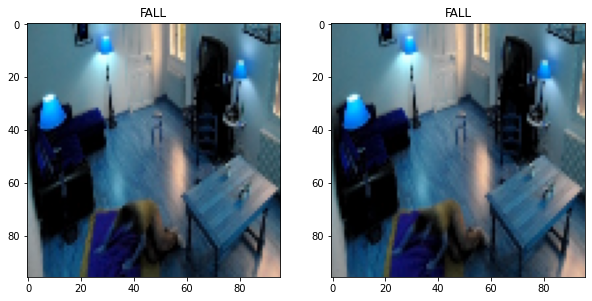

In [ ]:
# Home
plot_samples(train_images,train_labels)

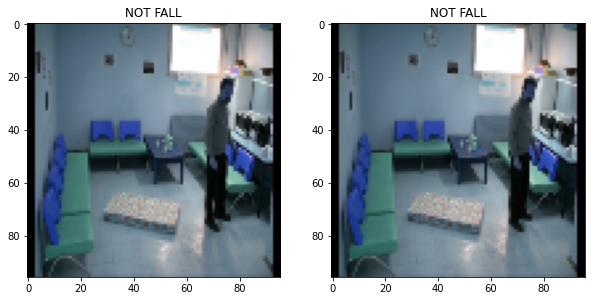

In [ ]:
# Coffee_room
plot_samples(train_images2,train_labels2)

# Fallnet

In [16]:
def conv2d(filters: int, name):
    return Conv2D(filters=filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.), bias_regularizer=l2(0.), name=name)

In [17]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, ReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.regularizers import l2

# fallnet architecture
def fallnet(X_train):
  model_input = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]), name='inputs')

  conv1 = conv2d(16, name='convoluton_1')(model_input)
  act1 = ReLU(name='activation_1')(conv1)
  pool1 = MaxPooling2D(pool_size=(2, 2), name='pooling_1')(act1)

  conv2 = conv2d(16, name='convolution_2')(pool1)
  act2 = ReLU(name='activation_2')(conv2)
  pool2 = MaxPooling2D(pool_size=(2, 2), name='pooling_2')(act2)

  conv3 = conv2d(32, name='convolution_3')(pool2)
  act3 = ReLU(name='activation_3')(conv3)
  pool3 = MaxPooling2D(pool_size=(2, 2), name='pooling_3')(act3)

  conv4 = conv2d(32, name='convolution_4')(pool3)
  act4 = ReLU(name='activation_4')(conv4)
  pool4 = MaxPooling2D(pool_size=(2, 2), name='pooling_4')(act4)

  conv5 = conv2d(64, name='convolition_5')(pool4)
  act5 = ReLU(name='activation_5')(conv5)
  pool5 = MaxPooling2D(pool_size=(2, 2), name='pooling_5')(act5)

  conv6 = conv2d(64, name='convolution_6')(pool5)
  act6 = ReLU(name='activation_6')(conv6)
  pool6 = MaxPooling2D(pool_size=(2, 2), name='pooling_6')(act6)

  flat = Flatten(name='flatten')(pool6)
  dense1 = Dense(32, name='dense1')(flat)
  output = Dense(1, activation='sigmoid', name='output')(dense1)

  model = Model(inputs=[model_input], outputs=[output])
  return model

In [33]:
model = fallnet(X_train_merged)
#model2 = fallnet(X_train2)

In [23]:
def train(model,X_train,y_train,X_val,y_val,epoche):
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005), loss='binary_crossentropy', metrics=['accuracy'])
  my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
  ] 
  history = model.fit(X_train,y_train, epochs = epoche, validation_data = (X_val, y_val),callbacks=my_callbacks)
  return history

In [34]:
history = train(model,X_train_merged,y_train_merged,X_val_merged,y_val_merged,8)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/8
864/864 [==============================] - 9s 8ms/step - loss: 0.2248 - accuracy: 0.9517 - val_loss: 0.0564 - val_accuracy: 0.9806
Epoch 2/8
864/864 [==============================] - 7s 8ms/step - loss: 0.0689 - accuracy: 0.9798 - val_loss: 0.0802 - val_accuracy: 0.9742
Epoch 3/8
864/864 [==============================] - 7s 8ms/step - loss: 0.0814 - accuracy: 0.9745 - val_loss: 0.0460 - val_accuracy: 0.9865
Epoch 4/8
864/864 [==============================] - 7s 8ms/step - loss: 0.0614 - accuracy: 0.9799 - val_loss: 0.0265 - val_accuracy: 0.9902
Epoch 5/8
864/864 [==============================] - 7s 8ms/step - loss: 0.0500 - accuracy: 0.9843 - val_loss: 0.0328 - val_accuracy: 0.9916
Epoch 6/8
864/864 [==============================] - 7s 9ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0724 - val_accuracy: 0.9767
Epoch 7/8
864/864 [==============================] - 7s 8ms/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0353 - val_accuracy: 0.9906
Epoch 8/8
864

In [ ]:
#history2 = train(model2,X_train2,y_train2,X_val2,y_val2,15)

In [35]:
def plot_history(history):
  # Sommario history della accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Sommario history della loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

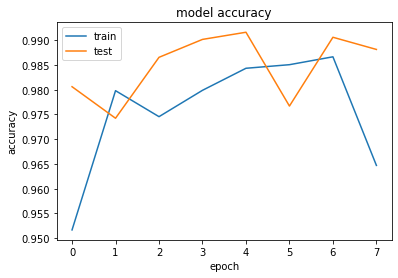

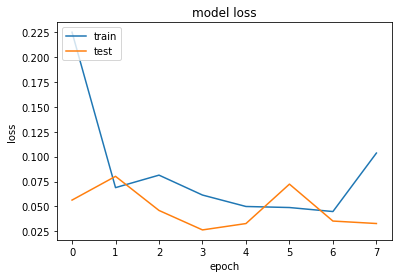

In [36]:
plot_history(history)

In [ ]:
#plot_history(history2)

# Salvataggio modelli

In [42]:
model.save('drive/MyDrive/FallDataset/DatasetProf/models/model.h5')
model.save('drive/MyDrive/FallDataset/DatasetProf/models/')

In [ ]:
#model2.save('drive/MyDrive/FallDataset/Coffee_room_01/models/model.h5')
#model2.save('drive/MyDrive/FallDataset/Coffee_room_01/models/')

# Testing dei modelli

In [27]:
print(type(test_images))
print(test_images.shape)

<class 'numpy.ndarray'>
(991, 96, 96, 3)


In [37]:
predicted_labels = (model.predict(test_images) >= 0.5).astype('int64').flatten()

31/31 [==============================] - 0s 3ms/step


In [ ]:
#predicted_labels2 = (model2.predict(test_images2) >= 0.5).astype('int64').flatten()

24/24 [==============================] - 2s 76ms/step


In [29]:
def plot_results(test_images,predicted_labels,test_labels):
  row = 3
  col = 5
  fig, axes = plt.subplots(row, col, figsize=(16, 14))
  c = 0
  good_predicted = 0
  total_tested = 0
  for i in range(row):
      for j in range(col):
          axes[i][j].imshow(test_images[c])
          axes[i][j].set_title(f'Predicted: {get_label(predicted_labels[c])}', fontsize=8)
          axes[i][j].set_xlabel(f'Actual: {get_label(test_labels[c])}', fontsize=8)
          if get_label(predicted_labels[c]) == get_label(test_labels[c]):
            good_predicted += 1
          total_tested += 1
          c += 1

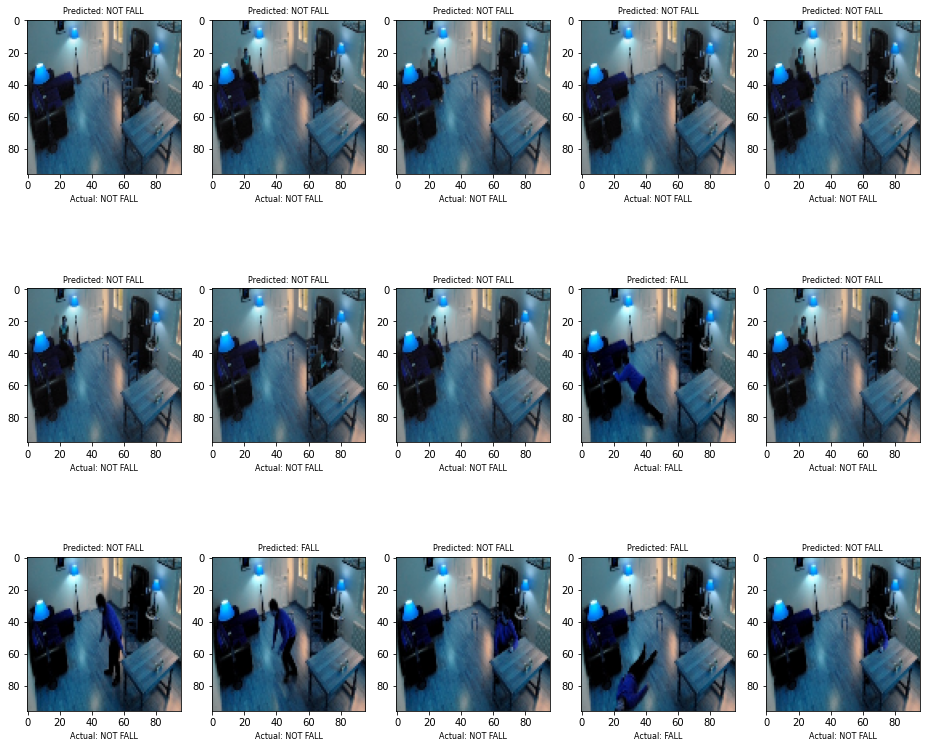

In [39]:
plot_results(test_images,predicted_labels,test_labels)

In [ ]:
#plot_results(test_images2,predicted_labels2,test_labels2)

In [31]:
def get_accuracy(predicted_labels,test_labels):
  good_predicted = 0
  total_tested = 0
  for i in range (0,len(test_labels)):
    if get_label(predicted_labels[i]) == get_label(test_labels[i]):
      good_predicted += 1
    total_tested += 1
  print("Accuracy: "+str(good_predicted)+"/"+str(total_tested) + " ("+str(good_predicted*100/total_tested)+"%)")

In [38]:
# Home_01
get_accuracy(predicted_labels,test_labels)

# Coffee_room_01
#get_accuracy(predicted_labels2,test_labels2) 

Accuracy: 967/991 (97.57820383451059%)


# Inferenza su video esterno al dataset

In [40]:
import imageio

def video_to_frames(video_path,fx=96,fy=96,cut_half=True):
  vidcap = cv2.VideoCapture(video_path)
  success,image = vidcap.read()
  count = 0
  frames = []
  while success:
      cv2.imwrite("frame"+str(count)+".jpg", image)     # save frame as JPEG file      
      success,image = vidcap.read()

      
      img = cv2.imread("frame"+str(count)+".jpg")

      if cut_half == True:
        #Prendo solo la metà destra del video
        height, width, channels = img.shape
        width_cutoff = width // 2
        img = img[:, width_cutoff:]
      
      img = cv2.resize(img, (fx,fy))
      frames.append(img)

      #print('Read a new frame: ', success)
      count += 1

  frames = np.array(frames,ndmin=4)
  return frames

In [ ]:
#frames = video_to_frames('drive/MyDrive/UR-Fall-Dataset-cam0-rgb-adl/fall-29-cam0.mp4')
frames2 = video_to_frames('drive/MyDrive/FallDataset/Coffee_room_01/video51.mp4',cut_half=False)

In [ ]:
#print(type(frames))
#print(frames.shape)

print(type(frames2))
print(frames2.shape)

<class 'numpy.ndarray'>
(203, 96, 96, 3)


In [ ]:
#predicted_frame_labels2 = (model2.predict(frames2) >= 0.5).astype('int64').flatten()

In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep

def display_frames_results(frames,predicted_frame_labels):
  count = 0
  for img in frames:
    #clear_output()
    print(get_label(predicted_frame_labels[count]))
    cv2_imshow(img)
    count += 1
    sleep(0.1)

In [ ]:
#display_frames_results(frames,predicted_frame_labels2)

NOT FALL


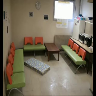

NOT FALL


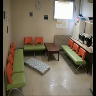

NOT FALL


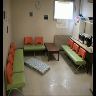

NOT FALL


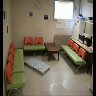

NOT FALL


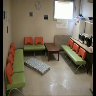

NOT FALL


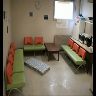

NOT FALL


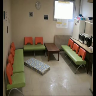

NOT FALL


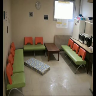

NOT FALL


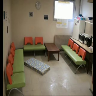

NOT FALL


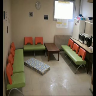

NOT FALL


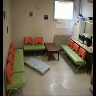

NOT FALL


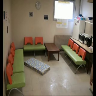

NOT FALL


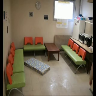

NOT FALL


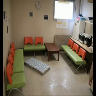

NOT FALL


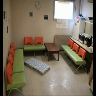

NOT FALL


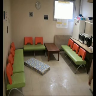

NOT FALL


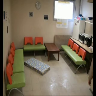

NOT FALL


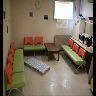

NOT FALL


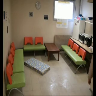

NOT FALL


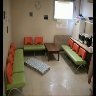

NOT FALL


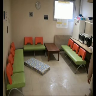

NOT FALL


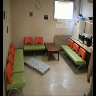

NOT FALL


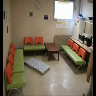

NOT FALL


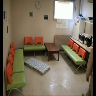

NOT FALL


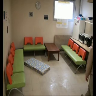

NOT FALL


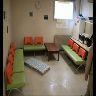

NOT FALL


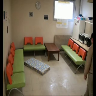

NOT FALL


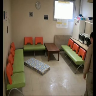

NOT FALL


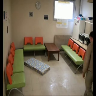

NOT FALL


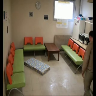

NOT FALL


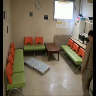

NOT FALL


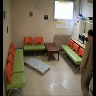

NOT FALL


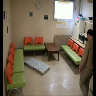

NOT FALL


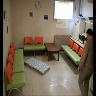

NOT FALL


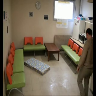

NOT FALL


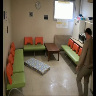

NOT FALL


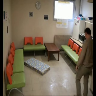

NOT FALL


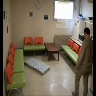

NOT FALL


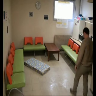

NOT FALL


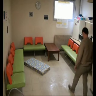

NOT FALL


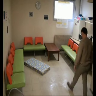

NOT FALL


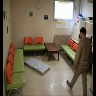

NOT FALL


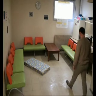

NOT FALL


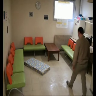

NOT FALL


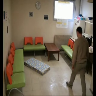

NOT FALL


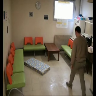

NOT FALL


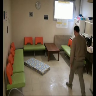

NOT FALL


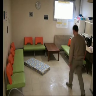

NOT FALL


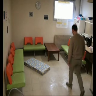

NOT FALL


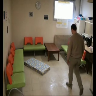

NOT FALL


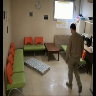

NOT FALL


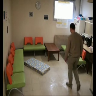

NOT FALL


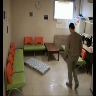

NOT FALL


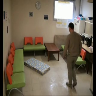

NOT FALL


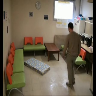

NOT FALL


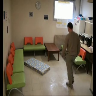

NOT FALL


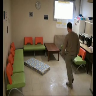

NOT FALL


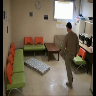

NOT FALL


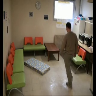

NOT FALL


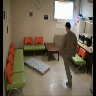

NOT FALL


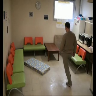

NOT FALL


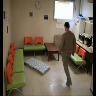

NOT FALL


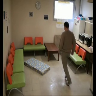

NOT FALL


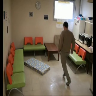

NOT FALL


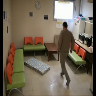

NOT FALL


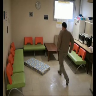

NOT FALL


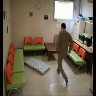

NOT FALL


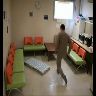

NOT FALL


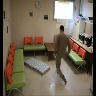

NOT FALL


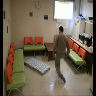

NOT FALL


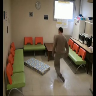

NOT FALL


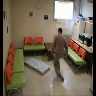

NOT FALL


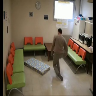

NOT FALL


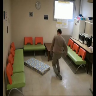

NOT FALL


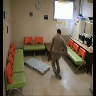

NOT FALL


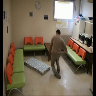

NOT FALL


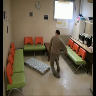

NOT FALL


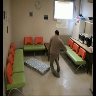

NOT FALL


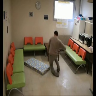

NOT FALL


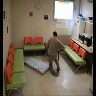

NOT FALL


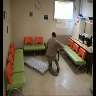

NOT FALL


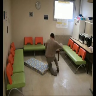

FALL


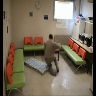

FALL


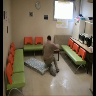

FALL


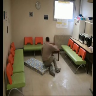

FALL


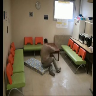

FALL


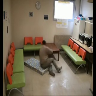

FALL


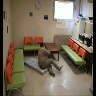

FALL


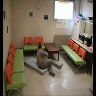

FALL


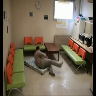

FALL


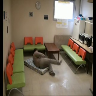

FALL


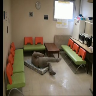

FALL


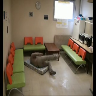

FALL


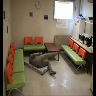

FALL


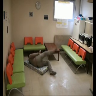

FALL


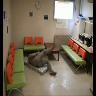

FALL


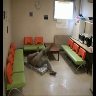

FALL


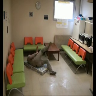

FALL


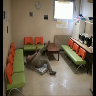

FALL


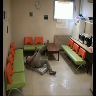

FALL


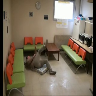

FALL


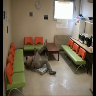

FALL


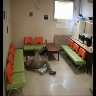

FALL


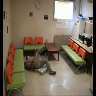

FALL


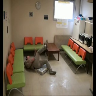

FALL


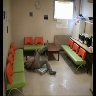

FALL


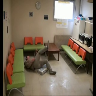

FALL


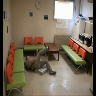

FALL


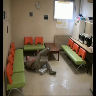

FALL


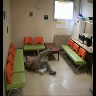

FALL


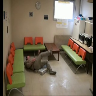

FALL


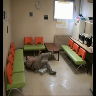

FALL


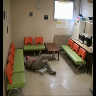

FALL


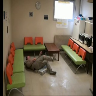

FALL


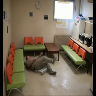

FALL


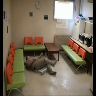

FALL


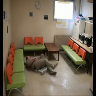

FALL


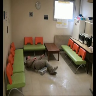

FALL


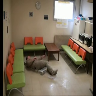

NOT FALL


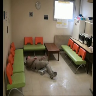

FALL


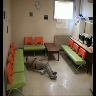

FALL


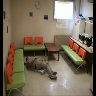

FALL


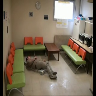

FALL


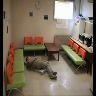

FALL


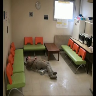

FALL


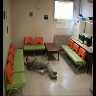

FALL


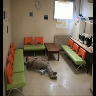

FALL


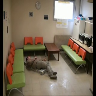

FALL


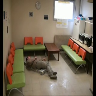

FALL


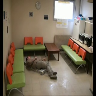

FALL


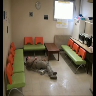

FALL


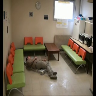

FALL


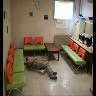

FALL


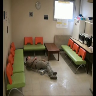

FALL


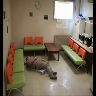

FALL


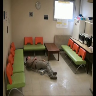

FALL


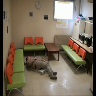

FALL


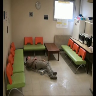

FALL


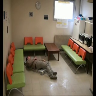

FALL


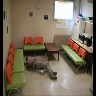

FALL


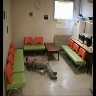

FALL


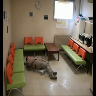

FALL


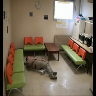

FALL


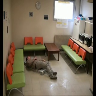

FALL


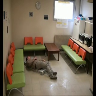

FALL


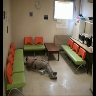

FALL


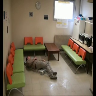

FALL


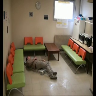

FALL


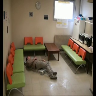

FALL


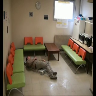

FALL


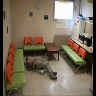

FALL


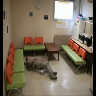

FALL


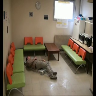

FALL


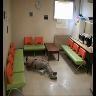

FALL


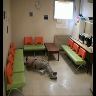

FALL


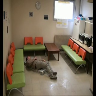

FALL


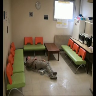

FALL


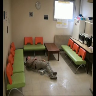

FALL


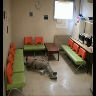

FALL


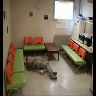

FALL


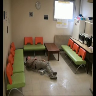

FALL


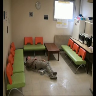

FALL


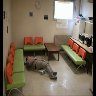

FALL


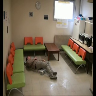

FALL


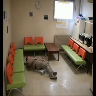

FALL


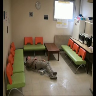

FALL


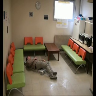

FALL


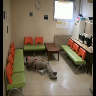

FALL


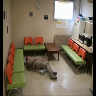

FALL


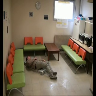

FALL


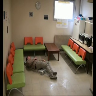

FALL


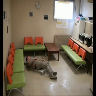

FALL


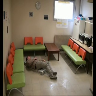

FALL


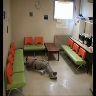

FALL


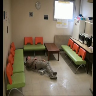

FALL


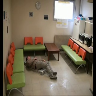

FALL


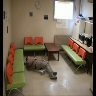

FALL


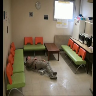

FALL


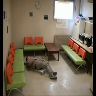

FALL


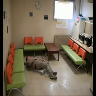

FALL


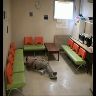

FALL


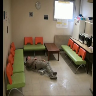

FALL


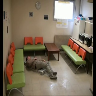

FALL


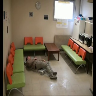

FALL


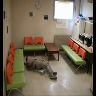

FALL


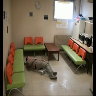

FALL


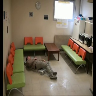

FALL


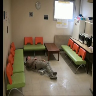

FALL


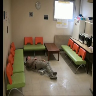

FALL


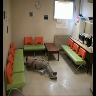

FALL


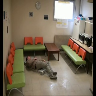

FALL


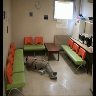

FALL


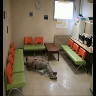

FALL


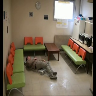

FALL


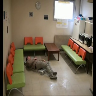

FALL


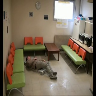

FALL


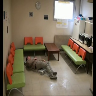

FALL


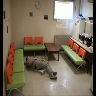

FALL


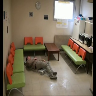

FALL


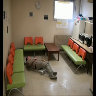

FALL


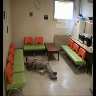

FALL


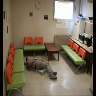

FALL


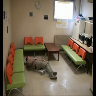

In [ ]:
display_frames_results(frames2,predicted_frame_labels2)

# Train dei modelli (Model1, LSTM) 

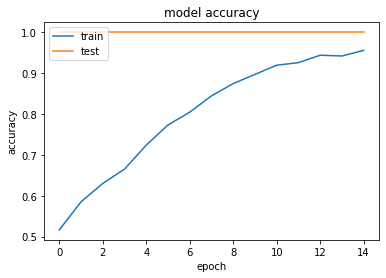

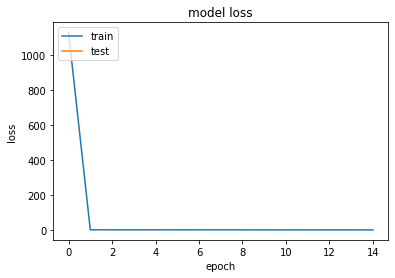

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Train Model2, Conv1D + LSTM Network

In [ ]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, MaxPooling2D
from tensorflow import keras
from keras.utils import to_categorical

X_train = X_train.reshape(TotalTrain*A*2,5,6,75)
X_test = X_test.reshape(TotalTest*A*2,5,6,75)

In [ ]:
model2 = Sequential()

model2.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(5,6,75)))
model2.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model2.add(TimeDistributed(Dropout(0.5)))
model2.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model2.add(TimeDistributed(Flatten()))

model2.add(LSTM(100))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
print(model2.summary())
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_20 (TimeDi  (None, 5, 4, 64)         14464     
 stributed)                                                      
                                                                 
 time_distributed_21 (TimeDi  (None, 5, 2, 64)         12352     
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 5, 2, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_23 (TimeDi  (None, 5, 2, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_24 (TimeDi  (None, 5, 128)         

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1600, 5, 6, 75)
(400, 5, 6, 75)
(1600, 1)
(400, 1)


In [ ]:
history = model2.fit(X_train, Y_train, epochs=15, validation_data=(X_test, Y_test))

Epoch 1/15
50/50 [==============================] - 4s 16ms/step - loss: 0.4490 - accuracy: 0.7731 - val_loss: 0.8932 - val_accuracy: 0.0000e+00
Epoch 2/15
50/50 [==============================] - 0s 6ms/step - loss: 0.1064 - accuracy: 0.9606 - val_loss: 0.8787 - val_accuracy: 0.0000e+00
Epoch 3/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0873 - accuracy: 0.9675 - val_loss: 0.5468 - val_accuracy: 1.0000
Epoch 4/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0581 - accuracy: 0.9762 - val_loss: 0.5406 - val_accuracy: 1.0000
Epoch 5/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0653 - accuracy: 0.9712 - val_loss: 0.4623 - val_accuracy: 1.0000
Epoch 6/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0324 - accuracy: 0.9837 - val_loss: 0.4966 - val_accuracy: 1.0000
Epoch 7/15
50/50 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9894 - val_loss: 0.5874 - val_accuracy: 1.0000
Epoch 8/15


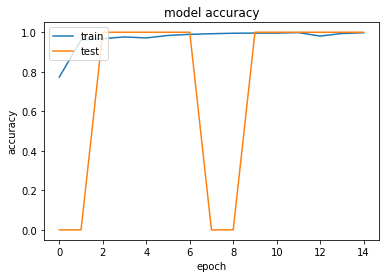

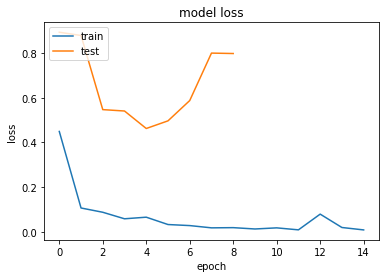

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Test dei modelli**


In [ ]:
def loaddata(testnumber):

  os.chdir('/content/drive/My Drive/FallDataset')

  #count successful poses
  nullposes = 0
  successfulposes = 0

  #total videos
  Videos = 10

  #number of samples per activity (walking, falling, laying down)
  A = 20
  #of frames per sample (timesteps)
  B = 30

  X = np.zeros((Videos*A*2,B,75)) #creating an empty array for image json data
  Y = np.zeros((Videos*A*2,1)) #create empty array for y data

  #initialize counters
  trainframecount = 0
  testframecount = 0

  i = str(testnumber)

  #count the number of videos in category
  path = '/content/drive/MyDrive/FallDataset/Home_01/Annotation_files'
  list = os.listdir(path)
  numvideos = len(list)

  #change into annotations file folder
  #print("Entering folder " + str(i) + ", which has " + str(numvideos) + " videos to process")
  os.chdir(path)
  
  #loop through each category
  j = 0
  while (j < numvideos):
    
    #count the number of frames in each video
    path = '/content/drive/My Drive/FallDataset/' + str(i) + '/testdata/video' + str(j)
    list = os.listdir(path) 
    numframes = len(list)
    
    #read in frames and determine beginning and ending frames of the fall
    filename = '/content/drive/My Drive/FallDataset/' + str(i) + '/Annotation_files/video (' + str(j+1) + ').txt'
    dummydata = pd.read_csv(filename, sep=" ", header=None, nrows=2)
    frame1 = dummydata[0][0] 
    frame2 = dummydata[0][1] 
    frame1 = int(frame1) - 5
    frame2 = int(frame2) + 30
    
    #change directory to jsondata folder
    path = '/content/drive/My Drive/FallDataset/' + str(i) + "/jsondata/video" + str(j)
    os.chdir(path)
    #print("Video " + str(j) + ": Processing " + str(numframes) + " frames.")
    
    
    #add all frames into array
    k = 0
    vidarray = []
    
    while (k < numframes):
      with open('frame' + str(k) + '_keypoints.json') as f:  
        try:
          data = json.loads(f.read())
          list = data[0]['people'][0]['pose_keypoints_2d']
          successfulposes +=1
        except:
          list = np.zeros(75)
          nullposes +=1
      vidarray.append(list)
      k += 1
      
    videoX = np.array(vidarray)
    
    #split video array into sets for fall, walking, and afterfall
    FallSet = videoX[frame1:frame2,:]
    WalkSet = videoX[0:frame1-1,:]
    AfterFallSet = videoX[frame2+1:len(videoX),:]  
 
    #capture falls
    for _ in range(A):
      idx = np.random.randint(0,len(FallSet)-B)
      X[testframecount,:,:] = FallSet[idx:idx+B,:]
      Y[testframecount,:] = 0
      testframecount += 1
      
    #capture walking
    for _ in range(A):
      idx = np.random.randint(0,len(WalkSet)-B)
      X[testframecount,:,:] = WalkSet[idx:idx+B,:]
      Y[testframecount,:] = 1
      testframecount += 1 
    
    j += 1   
  
  #reshape Y data to categorical
  Y = to_categorical(Y)

  #normalize input
  X = X /X.max()
  
  return X, Y

In [ ]:

from numpy import mean
from numpy import std

# repeat experiment
scores1 = []
scores2 = []
scores3 = []
scores4 = []

for r in range(20):
  X,Y = loaddata('Home_01')
  accuracy1 = model1.evaluate(X, Y, verbose = 0)
  accuracy1 = accuracy1[1] * 100.0000
  print(accuracy1)
  scores1.append(accuracy1)

for r in range(20):
  X,Y = loaddata('Home_01')
  X = X.reshape(Videos*A*2,5,6,75)
  accuracy2 = model2.evaluate(X, Y, verbose = 0)
  accuracy2 = accuracy2[1] * 100.0000
  print(accuracy2)
  scores2.append(accuracy2)
  
for r in range(20):
  X,Y = loaddata('Coffee_room_01')
  accuracy3 = model1.evaluate(X, Y, verbose = 0)
  accuracy3 = accuracy3[1] * 100.0000
  print(accuracy3)
  scores3.append(accuracy3)

for r in range(20):
  X,Y = loaddata('Coffee_room_01')
  X = X.reshape(Videos*A*2,5,6,75)
  accuracy4 = model2.evaluate(X, Y, verbose = 0)
  accuracy4 = accuracy4[1] * 100.0000
  print(accuracy4)
  scores4.append(accuracy4)

m1, s1 = mean(scores1), std(scores1)
m2, s2 = mean(scores2), std(scores2)
m3, s3 = mean(scores3), std(scores3)
m4, s4 = mean(scores4), std(scores4)
print('Accuracy 1, familiar data: %.3f%% (+/-%.3f)' % (m1, s1))
print('Accuracy 2, familiar data: %.3f%% (+/-%.3f)' % (m2, s2))
print('Accuracy 1, nonfamilar data: %.3f%% (+/-%.3f)' % (m3, s3))
print('Accuracy 2, nonfamilar data: %.3f%% (+/-%.3f)' % (m4, s4))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379


IndexError: ignored

In [ ]:
model1.save('drive/MyDrive/FallDataset/models')
model2.save('drive/MyDrive/FallDataset/models')

In [ ]:
model1.save('drive/MyDrive/FallDataset/models/model1.h5')
model2.save('drive/MyDrive/FallDataset/models/model2.h5')